# IRIS DATASET CLASSIFICATION
_______

### Problem Statement
* The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.
________

#### Dataset
* Use the Iris dataset available in the sklearn library.
______

### About Iris Dataset
* The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).
______

# 1. Loading and Preprocessing
* Load the Iris dataset from sklearn.
* Drop the species column since there is a clustering problem.

In [1]:
# importing libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from termcolor import colored
from sklearn.datasets import load_iris   # import iris dataset from sklearn

In [2]:
# Load the Iris dataset from sklearn.
iris = load_iris()

In [3]:
print(colored("DESCRIPTION OF IRIS DATASET\n___________________________\n", "green"))
print(iris.DESCR)

DESCRIPTION OF IRIS DATASET
___________________________

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: N

In [4]:
# get feature_names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# get target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# create data frame having species column
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data['species'] = iris.target_names[iris.target]

In [7]:
iris_data  #show data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
iris_data.shape

(150, 5)

In [9]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris_data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [11]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Original data Scatterplot

Text(0.5, 1.0, 'Iris Data Sepal Dimensions')

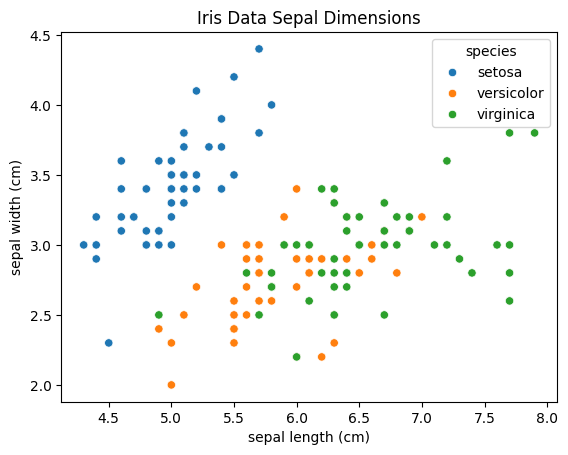

In [12]:
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data=iris_data, hue='species')
plt.title('Iris Data Sepal Dimensions')

Text(0.5, 1.0, 'Iris Data Petal Dimensions')

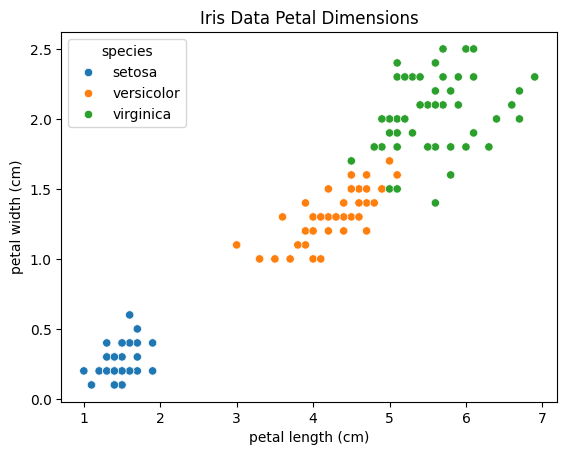

In [13]:
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data=iris_data, hue='species')
plt.title('Iris Data Petal Dimensions')

 _______
### Insights:

**Species Differentiation:**

* Both sepal and petal dimensions help in identifying and distinguishing between different Iris species, with petal dimensions providing more clear separation.

**Potential for Classification:**
* These relationships suggest that petal dimensions are stronger indicators for species classification, while sepal dimensions offer supplementary information.

**Cluster Patterns:**
* By observing the scatter plots, we can visually assess the possibility of creating machine learning models to classify Iris species based on these features.
______

In [14]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
iris_data_original = iris_data.copy()

In [16]:
iris_data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [17]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

_________
### NOTE:

* Iris dataset has 150 observations.

* The dataset has 4 features and 1 target.

* All features are numerical except target which is categorical.
    
* There are no missing values.

_______

In [18]:
iris_data.duplicated().sum()

1

In [19]:
iris_data = iris_data.drop_duplicates()

In [20]:
iris_data.duplicated().sum()

0

In [21]:
iris_data.reset_index(drop=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica


________
### Observation:

* The dataset contained 1 duplicate row.

* The duplicate row was removed to ensure the dataset consisted of unique observations.


* Removing duplicates reduced the dataset's size from 150 rows to 149 rows.

_________

In [22]:
iris_data_unique = iris_data.drop_duplicates().copy()

In [23]:
iris_data.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species               3
dtype: int64

In [24]:
iris_data['sepal length (cm)'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [25]:
iris_data['sepal width (cm)'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [26]:
iris_data['petal length (cm)'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [27]:
iris_data['petal width (cm)'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [28]:
iris_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [29]:
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

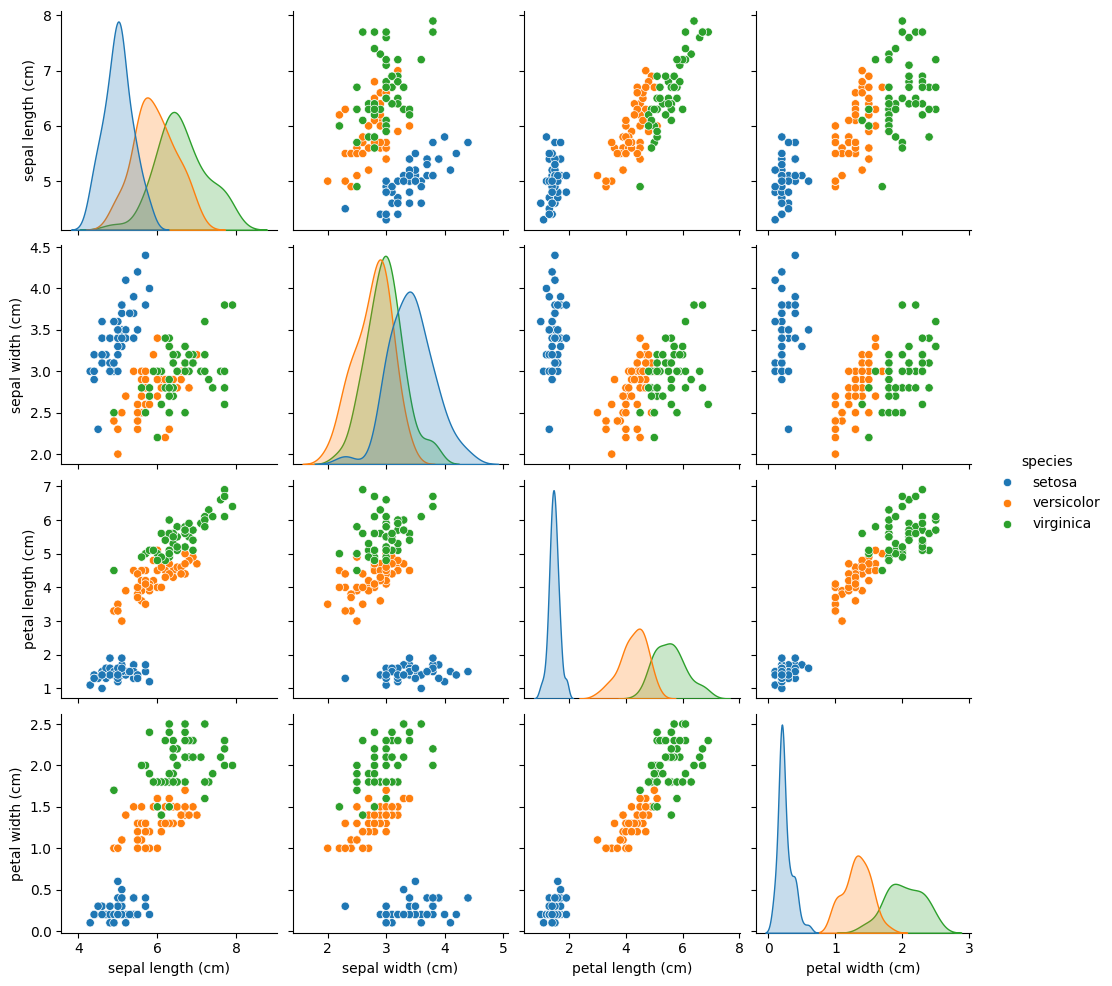

In [30]:
sns.pairplot(iris_data, hue='species')

________
### Insights:

##### Setosa is the most distinct species:

* It forms clear clusters across all feature combinations.
    
##### Versicolor and Virginica:
* They overlap in many feature combinations, suggesting closer similarity between these two species.
* Features like Petal Length and Petal Width are better at distinguishing them.

##### Petal Features are stronger predictors of species compared to Sepal Features:
* Petal dimensions provide better separation and less overlap.
_________

In [31]:
numeric_data = iris_data.select_dtypes("number")

In [32]:
numeric_data.skew()

sepal length (cm)    0.312826
sepal width (cm)     0.307149
petal length (cm)   -0.263101
petal width (cm)    -0.090076
dtype: float64

__________
### Insights:

* After analyzing skewness, most features in the Iris dataset (e.g., sepal length, sepal width, petal length, petal width) exhibit near-normal distributions.
    
* No significant skewness (values > 1 or < -1) was detected, suggesting that the data is relatively balanced and symmetrically distributed.

* Since the features are approximately symmetric, no transformations (e.g., log, square root, or Box-Cox) were applied.

__________

Text(0.5, 1.0, 'Box Plot Before Removing Outliers for Sepal Width')

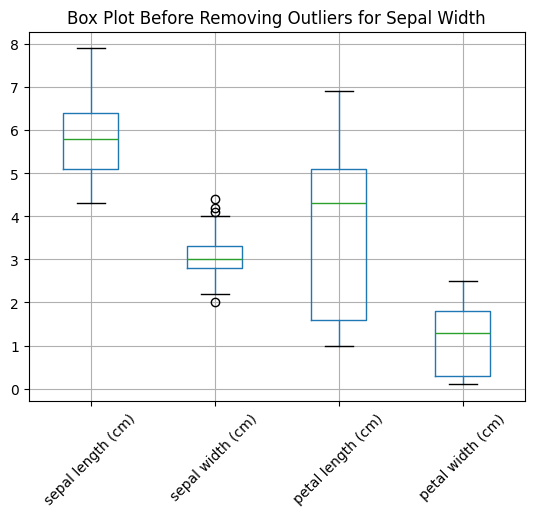

In [33]:
numeric_data.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot Before Removing Outliers for Sepal Width')

In [34]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


________
### Insights

**Petal Features (Length & Width):**

* Show the highest variability and are likely the strongest predictors for distinguishing species.
                                                                    
**Sepal Features (Length & Width):**

* Exhibit moderate to low variability, making them less effective for differentiation compared to petal features.
                                                                 
**Outliers:**

* Potential outliers in features like petal width and sepal width need further exploration.

**Overall:**

* The dataset is balanced, with no extreme skewness, and is ready for clustering after minor preprocessing like outlier handling.
________

In [35]:
#  Removing outliers based on IQR for a specific feature  'sepal width (cm)'
Q1 = iris_data['sepal width (cm)'].quantile(0.5)
Q3 = iris_data['sepal width (cm)'].quantile(0.75)
IQR = Q3-Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Remove outliers from the DataFrame
data_cleaned = iris_data[(iris_data['sepal width (cm)']>= lower_bound) & (iris_data['sepal width (cm)']<= upper_bound)]
data_cleaned

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [36]:
print(colored("IRIS DATASET BEFORE AND AFTER OUTLIER REMOVAL\n_____________________________________________\n", "blue"))
print("Dataset shape after being outliers removed:",data_cleaned.shape)
print("Dataset shape before being outliers removed:",iris_data.shape)

IRIS DATASET BEFORE AND AFTER OUTLIER REMOVAL
_____________________________________________

Dataset shape after being outliers removed: (118, 5)
Dataset shape before being outliers removed: (149, 5)


Text(0.5, 1.0, 'Box Plot After Removing Outliers for Sepal Width')

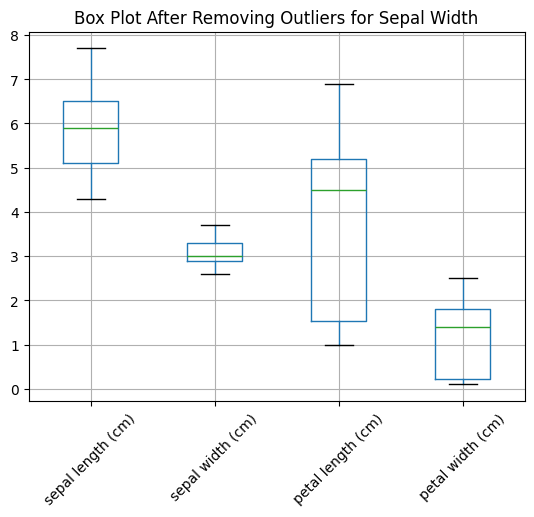

In [37]:
data_cleaned.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot After Removing Outliers for Sepal Width')

________
### Insights:

* Outliers were identified based on their position outside the defined lower and upper bounds (1.5 * IQR).

* The outliers were removed from the dataset, leaving only the data points within the acceptable range.
________

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

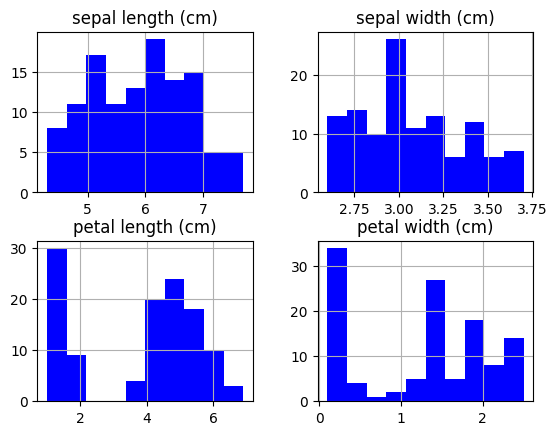

In [38]:
data_cleaned.hist(color="blue") 

In [39]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [40]:
X = iris_data.drop('species', axis=1)  # Features
y = iris_data['species']  # Target

In [41]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

________
### Insights

* Categorical data has been encoded into numerical values using LabelEncoder.

* This conversion makes the data suitable for machine learning models that require numerical input.
________                                         

In [42]:
scalar = StandardScaler()
iris_scaled = scalar.fit_transform(X)

In [43]:
iris_data_scaled = pd.DataFrame(iris_scaled, columns=X.columns)
iris_data_scaled['species'] = y

In [44]:
iris_data_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.898033,1.012401,-1.333255,-1.308624,0
1,-1.139562,-0.137353,-1.333255,-1.308624,0
2,-1.381091,0.322549,-1.390014,-1.308624,0
3,-1.501855,0.092598,-1.276496,-1.308624,0
4,-1.018798,1.242352,-1.333255,-1.308624,0


______
### Insights
* All numerical features have been scaled using StandardScaler.
 
* The scaling ensures that the features have a mean of 0 and a standard deviation of 1.
 
* This standardization prevents features with larger ranges from dominating the model, aiding in better model convergence and performance.
________

_________
**Correlation Matrix:**

* It shows the strength and direction of relationships between numerical variables.

* Values range from -1 to 1.

* --> +1: Perfect positive correlation

  
* --> -1: Perfect negetive correlation

  
* --> 0: No correlation

__________     

In [45]:
# Drop 'species' before calculating correlation
corr_matrix = iris_data.drop('species', axis=1).corr()
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.118129,0.873738,0.820620
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894
petal length (cm),0.873738,-0.426028,1.000000,0.962772
petal width (cm),0.820620,-0.362894,0.962772,1.000000


In [46]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
iris_data.shape

(149, 5)

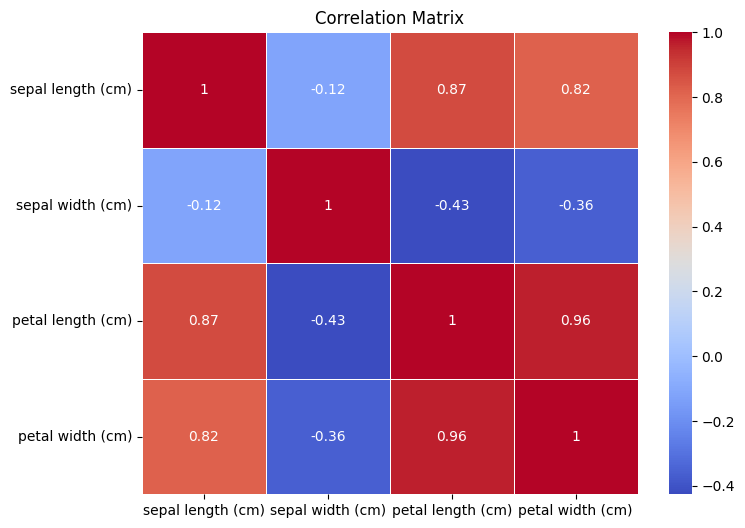

In [48]:
# correlation matrix vizualisation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

________
### Insights:
#### 1. Strong Correlations:

* **Petal length and petal width(0.96):** Almost perfectly positively correlated. As petal length increases, petal width increases too.
  
* **Sepal length and petal length(0.87):** Storng positive correlation.

* **Sepal length and petal width(0.82):** Strong positive correlation.

#### 2. Weak or Negetive Correlations:

* **Sepal length and sepal width(-0.12):** Weak negetive correlation.

 * **Sepal width and petal length(-0.43):** Moderate negetive correlation.

* **Sepal width and petal width(-0.36):** Moderate negetive correlation.
__________


_ _ _ _ _
### #Here we are going to create a dataframe with feature_names that doesn't include species column for Unsupervised Learning and clustering.

In [49]:
iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris.feature_names) # create a data frame from the iris dataset
iris_scaled_df.head() # view df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


________

# 2.Clustering Algorithm Implementation

## A) KMeans Clustering

* K-Means Clustering is an unsupervised learning algorithm, that divides the unlabeled dataset into 'K' different clusters in such a way that each dataset belongs only one group that has similar properties. It works by iteratively updating the centroids (geometric center) of the clusters and reassigning the data points to the cluster with the closest centroid.

#### Why KMeans:

* The dataset is well-separated into three classes.
  
* The features are numerical, making distance-based clustering.

* KMeans identifies natural groupings in data based on feature similarities. In the Iris dataset, these clusters often align with species labels, as features like petal length and width help distinguish the different species.

In [50]:
from sklearn.cluster import KMeans

In [51]:
#calculating WCSS scores for clusters ranging from 1 to 10.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(iris_scaled_df)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

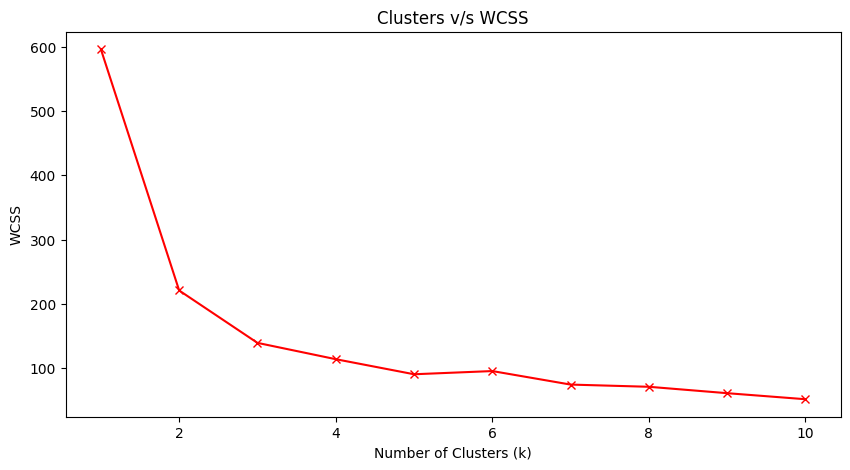

In [52]:
#plotting WCSS scores to identify optimal number of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='x', color='red')
plt.title('Clusters v/s WCSS')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

#### Note:
* Based on **Elbow Method** the ideal number of clusters appears to be **3**.

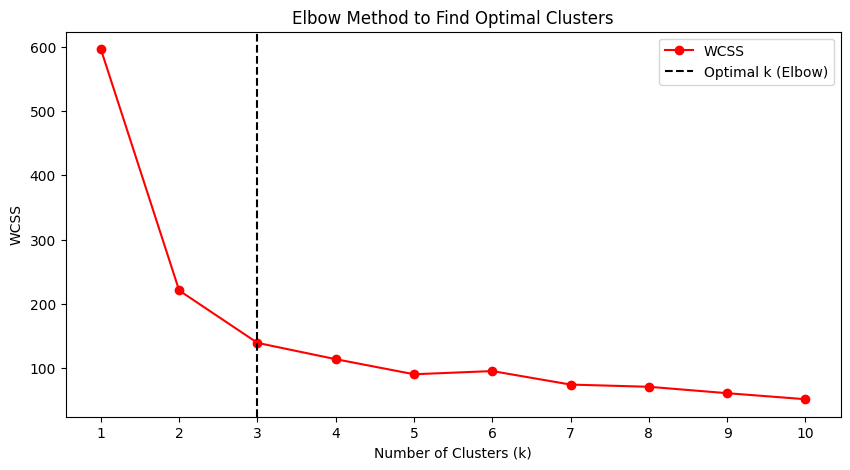

In [53]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, 'o-', label='WCSS', color='red')  # Add dots and orange color
plt.axvline(x=3, linestyle='--', color='black', label='Optimal k (Elbow)')
plt.title('Elbow Method to Find Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.legend()
plt.show()

In [54]:
#applying KMeans clustering with K=3
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(iris_scaled_df)

cluster_labels = kmeans.labels_
print(cluster_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2
 2]


In [55]:
from sklearn.metrics import silhouette_score

In [56]:
# Silhouette Score for KMeans
kmeans_silhouette = silhouette_score(iris_scaled_df, cluster_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette:.4f}")

KMeans Silhouette Score: 0.4589


Text(0.5, 1.0, 'KMeans Clustering')

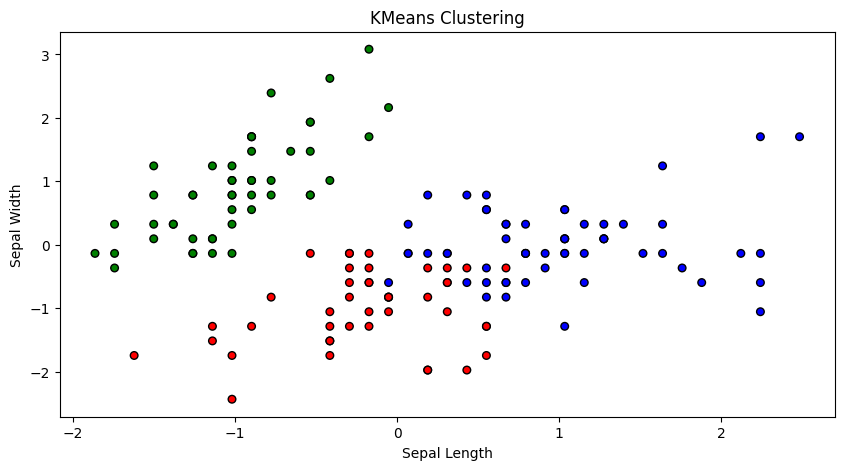

In [57]:
# Visualizing clusters
colors = ['red', 'green', 'blue']
plt.figure(figsize=(10,5))
plt.scatter(iris_scaled_df['sepal length (cm)'], iris_scaled_df['sepal width (cm)'], c=cluster_labels, s=30, cmap=plt.matplotlib.colors.ListedColormap(colors), edgecolor='black', label=cluster_labels)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KMeans Clustering')

__________

## B) Hierarchical Clustering

* Hierarchical clustering is an unsupervised learning algorithm that groups data into a tree of nested clusters by merging(**Agglomerative method**) or splitting(**Divisive method**) existing clusters. It can be visualized as a **dendrogram**, which shows the relationships between the clusters.

#### Agglomerative Hierarchical Clustering:

* This is the more common method, working in a bottom-up manner.
  
* It starts with each data point as a separate group.

* The algorithm then combines similar groups step-by-step until only one large group remains or until the desired number of groups is reached.

* The similarity between groups can be measured in various ways, such as using Ward's method or single linkage.


#### Divisive Hierarchical Clustering:

* Working in a top to bottom manner.

* Starts with all data points in one large group.

* It starts with one big group and then splits it into smaller and smaller groups, which can take a long time to do and computationally expensive.


#### Why Hierarchical clustering:

* It clusters data without needing to know the correct labels.
  
* The dataset has only three types of iris species that hierarchical clustering can easily group.

* It works well on small datasets like Iris, have only 150 samples and 4 features.

* It provides visual representations. (Dendrogram)

In [58]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

Text(0, 0.5, 'Distance')

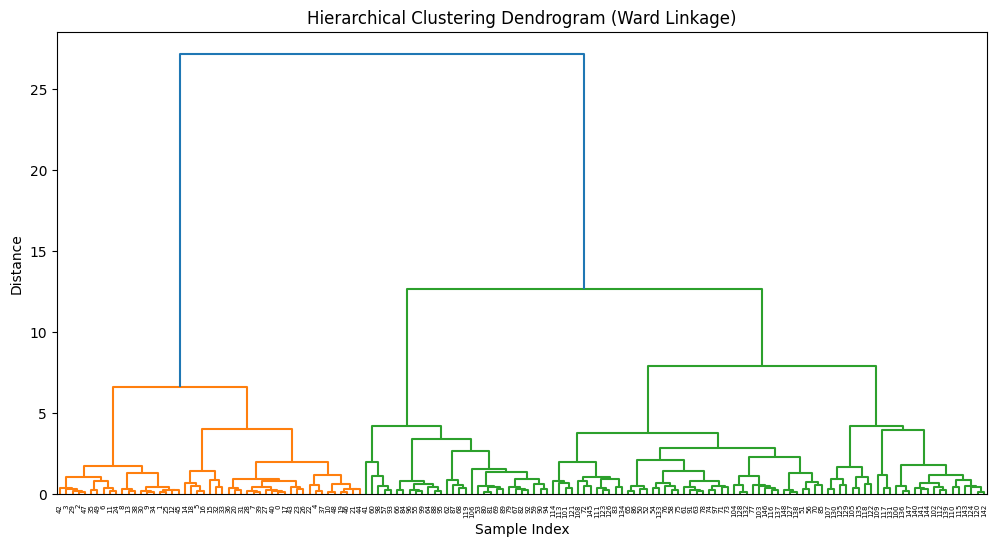

In [59]:
# linkage matrix
z = linkage(iris_scaled_df, method='ward')
# draw dendrogram
plt.figure(figsize=(12, 6))
dendrogram(z)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

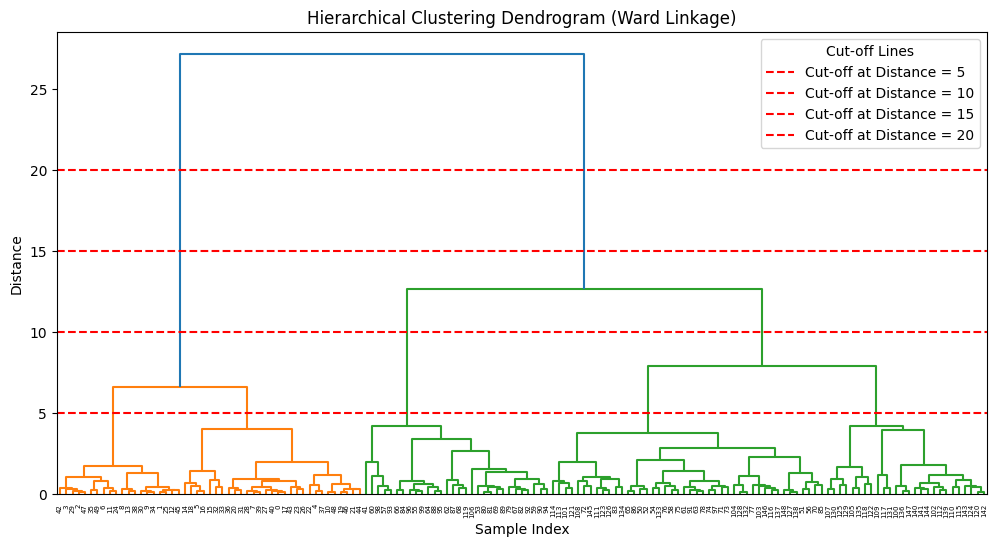

In [60]:
z = linkage(iris_scaled_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(z)

# Add multiple horizontal lines at different y values to indicate cut-off thresholds
for i in range(1, 5):  
    plt.axhline(y=i*5, color='r', linestyle='--', label=f'Cut-off at Distance = {i*5}')

plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Add a legend (only once for distinct cut-off lines)
plt.legend(title='Cut-off Lines')
plt.show()

In [61]:
# Applying Agglomerative Clustering on scaled data.
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc.fit_predict(iris_scaled_df) # fit model to the data
hc_cluster = hc.labels_ # get cluster labels

In [62]:
hc_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [63]:
# Silhouette Score for Hierarchical Clustering
hierarchical_silhouette = silhouette_score(iris_scaled_df, hc_cluster)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}")

Hierarchical Clustering Silhouette Score: 0.4498


Text(0.5, 1.0, 'Hierarchical Clustering')

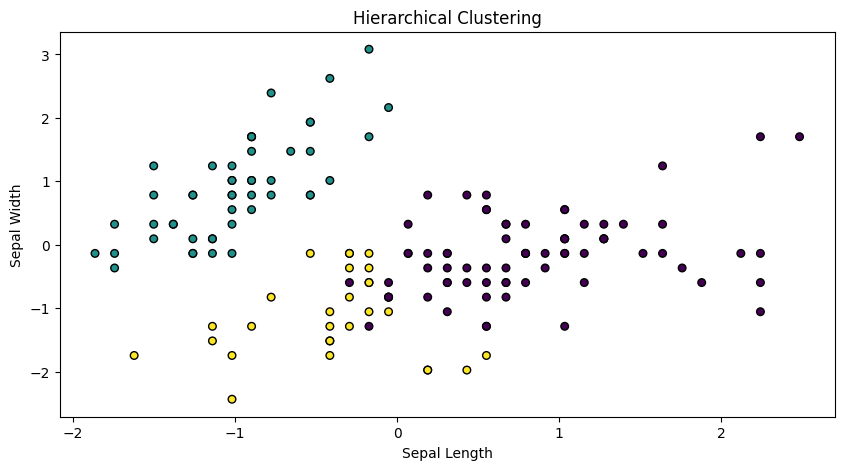

In [64]:
#Visualizing clusters
plt.figure(figsize=(10,5))
plt.scatter(iris_scaled_df['sepal length (cm)'], iris_scaled_df['sepal width (cm)'], c=hc_cluster, s=30,  edgecolor='black', label=hc_cluster)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Hierarchical Clustering')

__________

## Insights:

The Silhouette Score is a metric used to evaluate the quality of clusters. It ranges from -1 to 1:

* 1 indicates very well-separated and dense clusters (excellent clustering).
  
* 0 means the clusters are overlapping or indistinguishable (neutral clustering).

* Negative values indicate that some points might have been assigned to the wrong clusters (poor clustering).

  
## Results and Insights:

**KMeans Clustering:**
  
* The **Elbow Method** suggests that **3 clusters** is the optimal number for KMeans. This aligns with the Iris dataset’s known species: **Iris-Setosa, Iris-Versicolour, and Iris-Virginica.**
  
**Silhouette Score for KMeans: 0.46**

* This is a moderate score, indicating that the clusters are somewhat well-separated, but there might be some overlap.
* KMeans has performed decently, but there is room for improvement.
  
**Agglomerative Hierarchical Clustering:**

* The Silhouette Score for Agglomerative Clustering varies based on the number of clusters.
* By testing different cluster values, we can observe how the number of clusters impacts the clustering performance.
  
**Silhouette Score for Hierarchical Clustering: 0.44**

* This is also a moderate score, suggesting that the clusters are not perfectly distinct but are reasonable.
  
**Silhouette Scores for Different Numbers of Clusters (Agglomerative Clustering):**

* Using Agglomerative Clustering, the silhouette score is calculated for different numbers of clusters to find the optimal number.

In [65]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for different numbers of clusters
for n_clusters in range(2, 10):
    hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = hc.fit_predict(iris_scaled_df)
    score = silhouette_score(iris_scaled_df, cluster_labels)
    print(f"Silhouette Score for {n_clusters} clusters: {score}")

Silhouette Score for 2 clusters: 0.5762985431787423
Silhouette Score for 3 clusters: 0.449816434773055
Silhouette Score for 4 clusters: 0.40153278169051854
Silhouette Score for 5 clusters: 0.3309623180006978
Silhouette Score for 6 clusters: 0.3155375054706996
Silhouette Score for 7 clusters: 0.3181420771101477
Silhouette Score for 8 clusters: 0.3120729055752185
Silhouette Score for 9 clusters: 0.31262464456868344


## Interpretation:

* The Silhouette Score for 3 clusters is 0.46, which is the highest score in this case.
* This suggests that 3 clusters is the optimal choice for the Iris dataset, which is consistent with the known species classification.

* For Agglomerative Clustering, the silhouette scores for other values (like 2, 4, or 5 clusters) are lower, indicating that 3 clusters provides the best separation for the data.

## What Can Be Done to Improve?:

* **Adjust the number of clusters:** Experiment with different numbers of clusters using the Elbow Method for **KMeans** or by inspecting **the Dendrogram** for **Agglomerative Clustering**.

* **Tuning parameters:** Try other initialization methods or scaling techniques.
    
* **Try different clustering algorithms**.

________

# Conclusion
______

Both **KMeans** and **Agglomerative Clustering** show moderate performance with **Silhouette Scores** around **0.46** and **0.44** respectively. While both methods are not perfect, they provide reasonable clustering results. Fine-tuning the clustering parameters, or trying different algorithms, can potentially improve the separation of the clusters further. Based on the silhouette score calculations, **3 clusters** seem to be the best choice for this dataset.
_________